<a href="https://colab.research.google.com/github/LuisCastroV/ADA-Informes/blob/main/Informe_7_Pivot_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de estadísticos de orden ($Selection$)

Una buena práctica es tratar de reutilizar algoritmos clásicos, por ejemplo, se pide encontrar la mediana de los elementos de un arreglo, se puede usar un algoritmo de ordenamiento, como el $QuickSort$, para retornar el dato central, provocando la aparición del término reducción que lleva a la transformación de un problema a otro problema.

Donde un problema $A$ se reduce en otro problema $B$ si un algoritmo para resolver $B$ puede ser transformado "fácilmente” en un algoritmo para resolver $A$.

En estadística, el *estadístico de orden kº* es igual al *k-ésimo valor* más pequeño de una muestra estadística, junto con los estadísticos de rango, los estadísticos de orden son una de las herramientas fundamentales de la estadística no paramétrica y de inferencia.

Donde el problema de selección se encuentra directamente relacionado con estos estadísticos.

---
**Entrada:**  Conjunto de $n$ números diferentes $A$  más un índice $i$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$.

El elemento $x$ se conoce como estadístico de orden $i$-ésimo para el conjunto $A$.

---
**Imagen referencial de como obtener la mediana:**
![image](https://academia-lab.com/wp-content/uploads/2022/02/Mediana-1.webp)

# 2.1. Descripción del algoritmo

El algoritmo recibe un arreglo de $n$ elementos junto a un indice $i-ésimo$ menor elemento dentro de la lista.

- El arreglo de $n$ elementos se divide en n/5 grupos de 5 elementos cada uno, quedando el último grupo con menos elementos.

- Se encuentra la mediana de cada subarreglo, ordenándose con *Insertion Sort*.

- Se aplica PivotSelection recursivamente para encontrar la mediana $m$ de las n/5 medianas identificadas en el paso anterior. 

- Luego, $m$ será el pivote usado por el método Partition, dejando los elementos menores o iguales al pivote a la izquierda y a la derehcha los elementos mayores.

- Finalmente, se aplicará recursivamente Select con el subarreglo izquierdo o derecho, sea cual sea el correspondiente para buscar el i-ésimo menor elemento.

El algoritmo al ser recursivo se va a estar llamando continuamente hasta que llegue al caso en que el pivote y el i-ésimo elemento que se buscaban tengan el mismo orden, que es donde se revisa si se retorna el pivote o se sigue buscando recursivamente.

# 2.2. Ejemplo

Se busca el menor elemento del siguiente arreglo:

$a=[3,1,2,10,9,4,5,8,7,6]$

Se divide el arreglo en grupos de 5 elementos:

- $[3,1,2,10,9] - [4,5,8,7,6]$

Se aplica $InsertionSort$:

- $[1,2,3,9,10],[4,5,6,7,8]$

Se "almacena" la mediana de cada grupo:

- $[3,6]$

Se aplica $PivotSelection$ para encontrar la mediana, por debajo, de las medianas obteniendo como pivote, al $3$, con este pivote se realiza la partición:

- $[1,2,3,10,9,4,5,8,7,6]$

Se busca el *menor arreglo al pivote* y se observa que este se encuentra en la parte izquierda, repitiendo el proceso por recursividad:

- $[1,2]$

Como el arreglo es menor a $5$, tan solo se ordena y se busca la mediana, con esto se obtiene que la mediana es $2$.

- $[1] - [2]$

Encontrado el valor menor que seria $1$.








#2.3. Código

In [1]:
def insertionsort(A):
    for j in range(1,len(A)):
        key = A[j] 
        i = j-1 
        while (i > -1) and key < A[i]: 
            A[i+1]=A[i] 
            i=i-1 
        A[i+1] = key
    return A

In [28]:
def exchange(A,i,j):
    aux = A[i]
    A[i] = A[j]
    A[j] = aux

    return

def Partition(A,p,r):
    pivot = A[r]
    i = p-1
    j = p

    for j in range(j,r):  
        if A[j] <= pivot:
            i += 1
            exchange(A, i, j)
    exchange(A, i+1, r)
    return i+1

In [ ]:
def select(arr,left,right,i):
  if(left == right):
    return arr[left]
  #q = PivotSelection(arr,left,right,verbose) 
  #k = q-left+1 
  if(i == k):
    return arr[q]
  elif(i<k):
    return select(arr,left,q-1,i)
  else:
    return select(arr,q+1,right,i-k) 

In [ ]:
array=[18, 26, 14, 38, 83, 59, 57, 17, 62, 20, 32, 19, 55, 71, 47]
k=5
# elemento = select(array, 0, len(array) - 1, k)

#3. Propiedades del Algoritmo

#3.1. Correctitud del algoritmo

Para probar la correctitud del algoritmo, se usa inducción. Se plantea un caso base y en base a este probaremos que se cumple la correctitud para todo el algoritmo.

- Caso base

$Select$ recibe un arreglo $A$ de $n$ elementos y un índice $i$, retornando el valor del $i-esimo$ elemento más pequeño de A.

Se escoge $n=1$, se cumple la declaración pues al ser un elemento único el índice $i$ este solo vale 1, que corresponde al único elemento del arreglo.


- Caso inductivo

El arreglo entra en $pivotSelection$, donde existirán 3 conjuntos, los que contendran los elementos menores al pivote, el pivote y los elementos mayores al pivote.

$Partition$ ubica el pivote en su posición correcta, por lo que si la posición del pivote coincide con el índice $i$, se encontraria la solución. Si el valor resulta ser menor, se buscará el $i-esimo$ en el conjunto que contiene a los elementos menores que el pivote, en caso contrario, se buscará en el conjunto de mayores.

Ya que $partition$ esta en llamadas recursivas se continua realizando particiones y ubicando a los elementos en los distintos conjuntos que les corresponda. Cuando el tamaño de uno de estos subarreglos sea 1 se habrá encontrado el i-eimo elemento.

#3.2. Tiempo de ejecución

$T(n) <= T(n/5) + T(7n/10) + O(n)$

- Peor y mejor caso = $O(n)$

#4. Experimentos

#4.1 Mejor y peor caso teórico

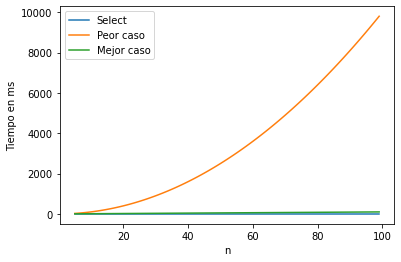

In [29]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]
y1=[n*n for n in range(5,100)] #Peor caso
y2=[n for n in range(5,100)] #Mejor caso
y=[]; 

for n in range(5,100):
    a = random.sample(range(-100, 1000), n)
    Iesimo = random.randint(0,n)
    contador = 0
    x.append(n)
    y.append(contador)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Peor caso", "Mejor caso"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()